<a href="https://colab.research.google.com/github/emily1618/Statistics-and-Models/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction 🏥

---

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US. The most recent dataset (as of February 15, 2022) includes data from 2020. 2020 annual CDC survey data of 400k adults related to their health status. The original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods. We will treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease) and make prediction on if the 
participant will have heart disease or no. 

**Step 1**: Load the libraries

**Step 2**: EDA

**Step 3**: Preprocess Data

**Step 4**: Resample and Feature Importance

**Step 5**: Models and Parameter Optimization (DT, RF and LOG)

**Step 6**: Summary

**Extra**: Auto-ML technique





## Step 1: load the libraries

In [1]:
#Standard
import pandas as pd
import numpy as np

#Visualizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Metrics Additional
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier

#Encoding
from sklearn.preprocessing import LabelEncoder

#Feature Selection
import lightgbm as lgb

#Resampling
from imblearn.over_sampling import RandomOverSampler

#Sampling
from sklearn.utils import resample

#Tuning
from sklearn.model_selection import GridSearchCV

#Others
import warnings
warnings.filterwarnings('ignore')

## Step 2: EDA

In [2]:
df = pd.read_csv('/content/heart_2020.csv')

In [ ]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


✅ **Column Descriptions**:

HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

BMI: Body Mass Index (BMI).

Smoking: Have you smoked at least 100 cigarettes in your entire life?

AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke: (Ever told) (you had) a stroke?

PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

DiffWalking: Do you have serious difficulty walking or climbing stairs?
Sex: Are you male or female?

AgeCategory: Fourteen-level age category. (then calculated the mean)

Race: Imputed race/ethnicity value.

Diabetic: (Ever told) (you had) diabetes?

PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

GenHealth: Would you say that in general your health is...

SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
Asthma: (Ever told) (you had) asthma?

KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer: (Ever told) (you had) skin cancer?

**Categorical Features:**
HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

**Numerical Features:**
BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [3]:
fig = px.pie(df['HeartDisease'])
fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=['#DAE5D0','#F9EBC8']))

fig.update_layout(title_text='HeartDisease', title_x=0.5)
fig.show()

In [4]:
fig = px.pie(df['Race'])
fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=['#DAE5D0','#F9EBC8', '#FEFBE7', '#A0BCC2', '#c8b9c9', '#E6BA95' ]))

fig.update_layout(title_text='Race', title_x=0.5)
fig.show()

In [5]:
fig = px.pie(df['GenHealth'])
fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=['#DAE5D0','#F9EBC8', '#FEFBE7', '#A0BCC2', '#c8b9c9' ]))

fig.update_layout(title_text='GenHealth', title_x=0.5)
fig.show()

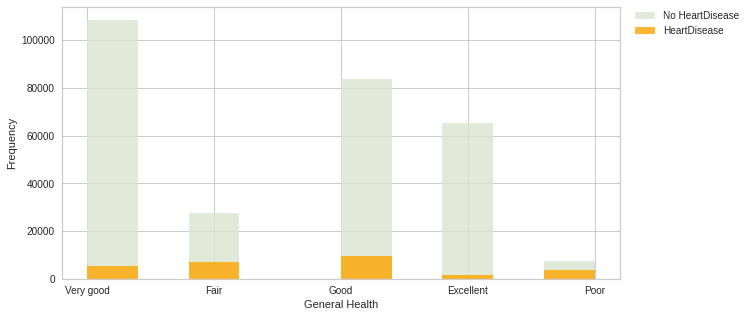

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#DAE5D0", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=0.8, color="orange", label="HeartDisease")

ax.set_xlabel("General Health")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


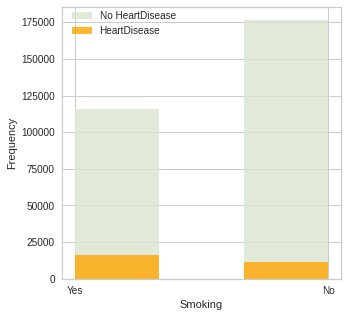

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#DAE5D0", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=0.8, color="orange", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(.02, 1), loc=2, borderaxespad=0.)


In [ ]:
fig = go.Figure(px.histogram(df, x = 'BMI', title = 'Distribution of BMI'))
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(color='#A0BCC2'))
fig.show()

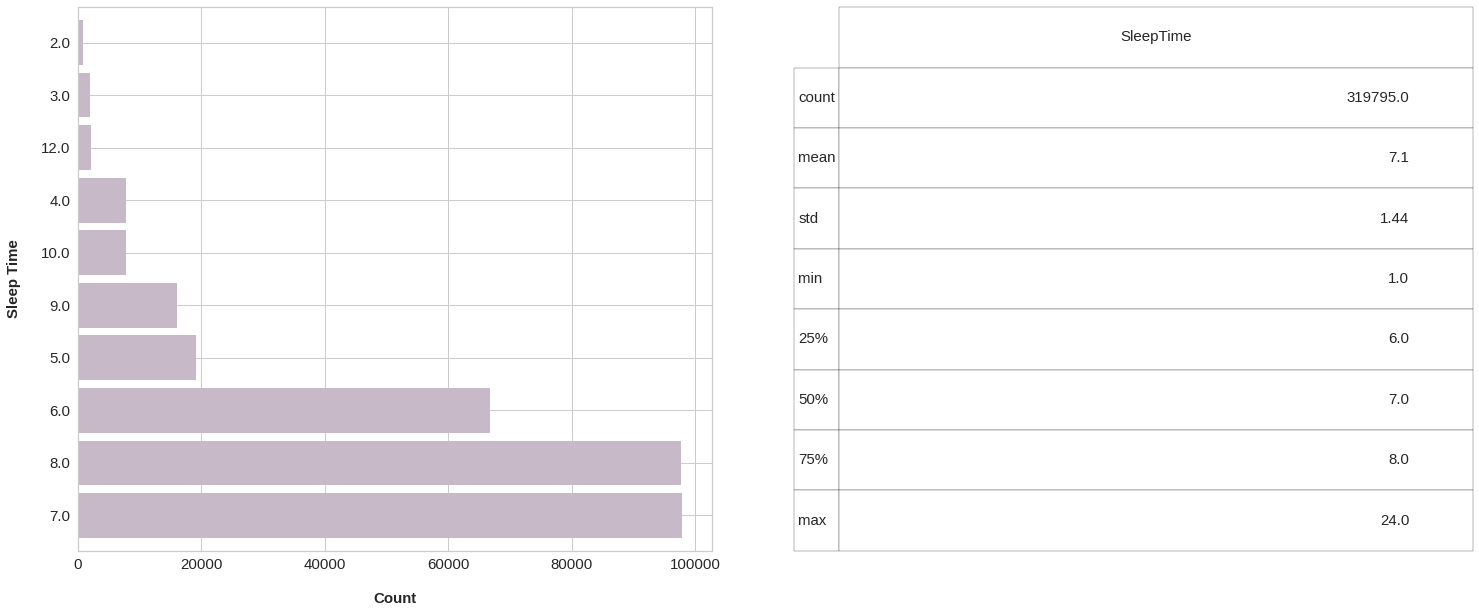

In [ ]:
# Sleep time distribution

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
age = df['SleepTime'].value_counts().head(10)
ax1 = age.plot(kind='barh', figsize=(25, 10), color='#c8b9c9', zorder=2, width=0.85)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel("Count", labelpad=20, weight='bold', size=15)
ax1.set_ylabel("Sleep Time", labelpad=20, weight='bold', size=15)


dfxx = df['SleepTime'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=15
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

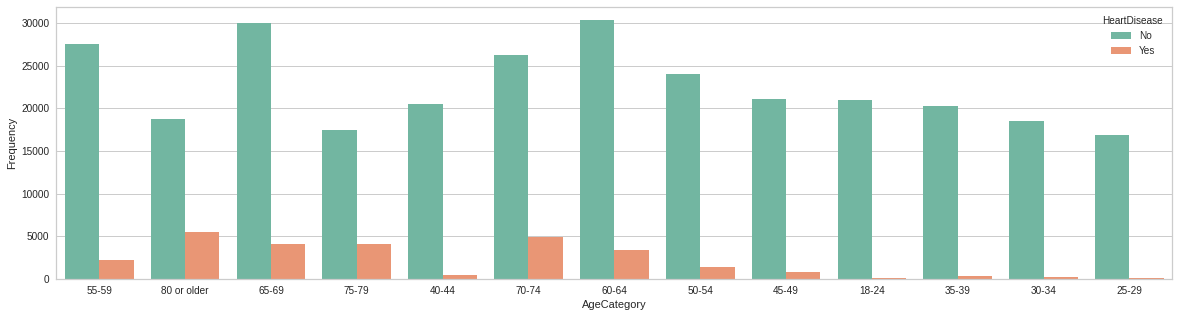

In [ ]:
# Age vs HeartDisease

plt.figure(figsize = (20,5))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette="Set2")
fig.suptitle("Age vs. Heart Disease")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Make age a numerical data using mean

AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float64')

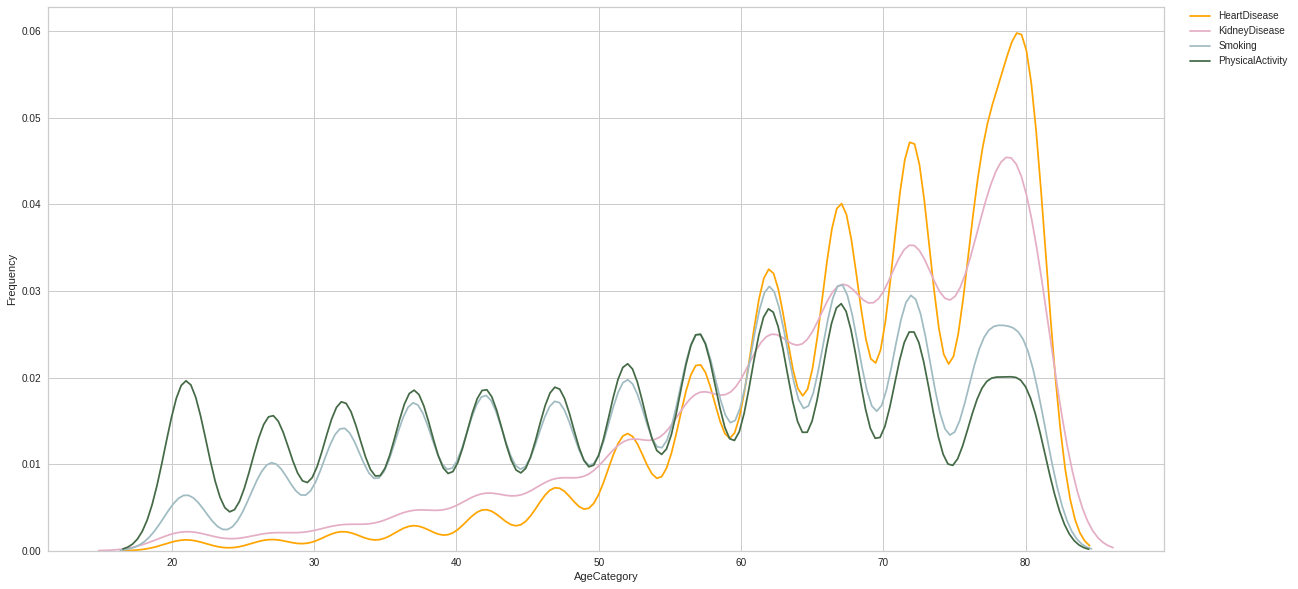

In [ ]:
# Relationship between the different smoking, physical acitivity, diseases and age. 
# As age increases, smoking and physical activity decreased but heart and kidney disease rate go up. 

fig, ax = plt.subplots(figsize = (20,10))
sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color='orange', label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color='#E4AEC5', label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["Smoking"]=='Yes']["AgeCategory"], alpha=1,shade = False, color='#A0BCC2', label="Smoking", ax = ax)
sns.kdeplot(df[df["PhysicalActivity"]=='Yes']["AgeCategory"], alpha=1,shade = False, color='#446A46', label="PhysicalActivity", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

## Step 3: Preprocess Data

In [ ]:
#Normalize the numerical data

#for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    #df[col] = df[col]/df[col].max()

#num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
#Scaler = StandardScaler()
#df[num_cols] = Scaler.fit_transform(df[num_cols])

In [ ]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [ ]:
# Encode columns 0 or 1 / have two unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


In [ ]:
# One-hot encode columns with more than two unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth'])

## Step 4: Resample and Feature Importance

In [ ]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
# Splitting the dataset to Train and test

sampler = RandomOverSampler(random_state=0)

X_resampled, y_resampled = sampler.fit_resample(X, y)
print(y_resampled.value_counts())

X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,
                                               test_size=0.2,random_state=42,stratify=y_resampled)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

0    292422
1    292422
Name: HeartDisease, dtype: int64


In [ ]:
# Normalize the numerical train and test data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Feature importance 

feature_importances = np.zeros(X_train.shape[1])

model = lgb.LGBMClassifier()
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

# Top features
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head(10)

# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(100)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.473741
There are 0 features with 0.0 importance


,feature,importance
0,BMI,292.0
8,AgeCategory,203.0
10,SleepTime,120.5
4,PhysicalHealth,100.0
5,MentalHealth,100.0
7,Sex,77.5
3,Stroke,64.0
1,Smoking,49.5
24,GenHealth_Excellent,46.5
28,GenHealth_Very good,40.0


## Step 5: Models and Parameter Optimization - Decision Tree, Random Forest and Logistic Regression

In [ ]:
def model_result(model, X_test, y_test):
    from sklearn import metrics

    # Prediction
    y_pred = model.predict(X_test)

    # Accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # AUC
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # CM
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
# Decision Tree model without optimization
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

# Evaluate Model
clf_result = model_result(clf, X_test, y_test)

print(f'Decision tree has {clf.tree_.node_count} nodes with maximum depth {clf.tree_.max_depth}.') 
print(f'Model Accuracy: {clf.score(X_train, y_train)}')
print('Accuracy Score:', clf_result['acc'])
print('Precision:', clf_result['prec'])
print('Recall:', clf_result['rec'])
print('F1 Score:', clf_result['f1'])
print('Cohens Kappa Score:', clf_result['kappa'])
print('Area Under Curve:', clf_result['auc'])
print('Confusion Matrix:\n', clf_result['cm'])

Decision tree has 79999 nodes with maximum depth 59.
Model Accuracy: 0.9965824205183008
Accuracy Score: 0.9549025810257419
Precision: 0.9177120786296337
Recall: 0.9994186444155666
F1 Score: 0.9568242275424594
Cohens Kappa Score: 0.9098052306975517
Area Under Curve: 0.9573004756111934
Confusion Matrix:
 [[53244  5241]
 [   34 58450]]


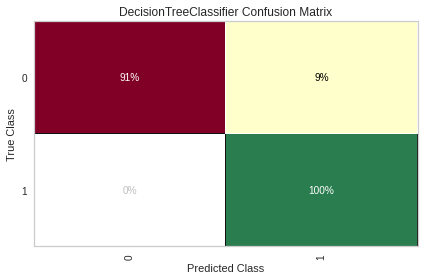

In [ ]:
classifiers=[DecisionTreeClassifier()]
classes = [0,1]
model = clf

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

In [ ]:
# Decision Tree model with optimization using GridSearch

params = {'max_depth': list(range(50, 70)),
          'criterion': ('gini', 'entropy')}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=2)
grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

Fitting 2 folds for each of 40 candidates, totalling 80 fits


DecisionTreeClassifier(max_depth=63)

In [ ]:
params = {'max_depth': list(range(50, 70)),
          'max_leaf_nodes': list(range(79995, 80005))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=2)
grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

Fitting 2 folds for each of 200 candidates, totalling 400 fits


DecisionTreeClassifier(max_depth=52, max_leaf_nodes=80001)

In [ ]:
# Decision Tree model after optimization. 
# Ininital parameter tuning took over 3 hours due to the size of data. I stopped the process because it was taking too long. 
# For the second time, I just tune a two parameters with limited range for decision tree. Obviously, the accuracy score decreased. 

clf_opt = DecisionTreeClassifier(max_depth=52, max_leaf_nodes=80001) 
clf_opt.fit(X_train, y_train)

# Evaluate Model
clf_result_opt = model_result(clf_opt, X_test, y_test)

print('Accuracy Score:', clf_result['acc'])

Accuracy Score: 0.7623814856927904


In [ ]:
# Random Forest model without optimization
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

# Evaluate Model
clf_result = model_result(clf2, X_test, y_test)

# Print result
print(f'Model Accuracy: {clf.score(X_train, y_train)}')
print('Accuracy Score:', clf_result['acc'])
print('Precision:', clf_result['prec'])
print('Recall:', clf_result['rec'])
print('F1 Score:', clf_result['f1'])
print('Cohens Kappa Score:', clf_result['kappa'])
print('Area Under Curve:', clf_result['auc'])
print('Confusion Matrix:\n', clf_result['cm'])

Model Accuracy: 0.9965824205183008
Accuracy Score: 0.9693423043712437
Precision: 0.9426115841073271
Recall: 0.9995383352711853
F1 Score: 0.9702406639004149
Cohens Kappa Score: 0.938684640395637
Area Under Curve: 0.9976510689684617
Confusion Matrix:
 [[54926  3559]
 [   27 58457]]


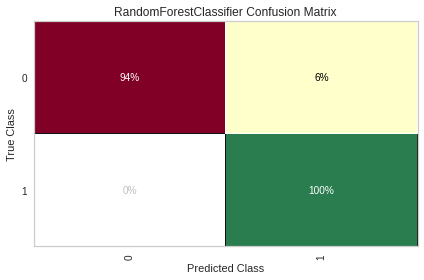

In [ ]:
classifiers=[RandomForestClassifier()]
classes = [0,1]
model = clf2

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

In [ ]:
# Logistic Regression model without optimization
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

# Evaluate Model
clf_result = model_result(clf3, X_test, y_test)

print(f'Model Accuracy: {clf.score(X_train, y_train)}')
print('Accuracy Score:', clf_result['acc'])
print('Precision:', clf_result['prec'])
print('Recall:', clf_result['rec'])
print('F1 Score:', clf_result['f1'])
print('Cohens Kappa Score:', clf_result['kappa'])
print('Area Under Curve:', clf_result['auc'])
print('Confusion Matrix:\n', clf_result['cm'])

Model Accuracy: 0.9965824205183008
Accuracy Score: 0.7623814856927904
Precision: 0.7551631248129302
Recall: 0.7765200738663566
F1 Score: 0.7656927045573333
Cohens Kappa Score: 0.5247630862545722
Area Under Curve: 0.8392413741877887
Confusion Matrix:
 [[43761 14724]
 [13070 45414]]


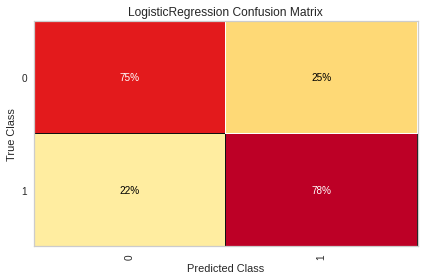

In [ ]:
classifiers=[LogisticRegression()]
classes = [0,1]
model = clf3

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

## Step 6: Summary

My dataset contains (319,795 rows, 18 columns). Parameter tuning took over 3 hours using GridSearch CV and plotting methods, and the process is still going after 3 hours. Due to time constraint, I stopped the process because it was taking too long. For the second time, I just tune a smaller amount of parameters for decision tree. 

Overall, without parameter tuning, the *accuracy score* is as followed:

**Decision Tree**: 95.49%

🚩 **Random Forest**: 96.93%   **<- best score model** 🚩

**Logistic Regression**: 76.24%

Random forest have a pretty good accuracy score at 96.93%. I don't think continue to tune the model is necessary due to the time constraint (taking too long) and issue with **overfitting**. Feature tuning show all feature have some importantce, so a better idea is to take a look at the features again and tune them.

Because we are predicting heart disease, we want to make sure minimize the chance predicting someone who doesn't have a heart disease or 0, but in fact they do or 1. The person having this mis-diagnosis will lead to delay in their heart treatment. This is a False Negative or Type 2 Error. Let's take a look at this:

**Decision Tree FN**: 34 predictions

🚩 **Random Forest FN**: 27 predictions   **<- least FN prediction** 🚩

**Logistic Regression FN**: 13070 predictions

False positive or Type 1 Error is when predicting someone have heart disease but in fact they don't. The person will get treated for a something they don't have. Although this error is still not good, but at least the person won't have delay in treatment and will be examine again by a medical professional to determine if the person in fact have heart-related problems. 

**Last note,** as mentioned earlier, there may be a overfitting issue due to the dataset clearly favor 0 or no heart disease (unbalanced dataset). 




## Extra: Auto ML 

Auto ML are useful because it can simplified many lines of code. However, in my case, due to the size of my dataset, the auto ML technique using Pycaret took a very long time to run. I had to stopped the process. The processing part that took a long time is: exp = setup(data = data, target = 'HeartDisease', session_id=77 ). 


In [ ]:
#pip install pycaret

from pycaret.classification import *

In [ ]:
data = df.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (255836, 30)
Unseen Data For Predictions (63959, 30)


In [ ]:
data['HeartDisease'].value_counts()

0    233913
1     21923
Name: HeartDisease, dtype: int64

In [ ]:
#exp = setup(data = data, target = 'HeartDisease', session_id=77 )

In [ ]:
#Compare and choose your model

#compare_models()

In [ ]:
#rf_model = create_model('rf', fold = 5)

In [ ]:
#Tuning the model

#rf_tuned = tune_model(rf_model)

In [ ]:
# Score and confusion matrix

#predict_model(rf_tuned)
#plot_model(rf_tuned, plot = 'confusion_matrix')

In [ ]:
# Use on new predictions on unseen data

#new_prediction = predict_model(rf_tuned, data=data_unseen)
#new_prediction